# 1. Preliminary visualizations of single and multiple features.

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


df = pd.read_csv('../Data/nil_full_100_combined.csv')

df.head()


,Rank,Name,Position,Class,Weight,Rating,NIL_Value,Total_Followers,Team,Conference
0,1,Arch Manning,QB,JR,220,99.53,5300000,512400,Texas Longhorns,SEC
1,2,Jeremiah Smith,WR,SO,215,99.61,4200000,875000,Ohio State Buckeyes,Big Ten
2,3,Carson Beck,QB,RS-SR,230,91.28,3100000,167000,Miami Hurricanes,ACC
3,4,Bryce Underwood,QB,FR,214,99.87,3000000,313000,Michigan Wolverines,Big Ten
4,5,Fernando Mendoza,QB,RS-JR,208,79.83,2600000,18500,Indiana Hoosiers,Big Ten


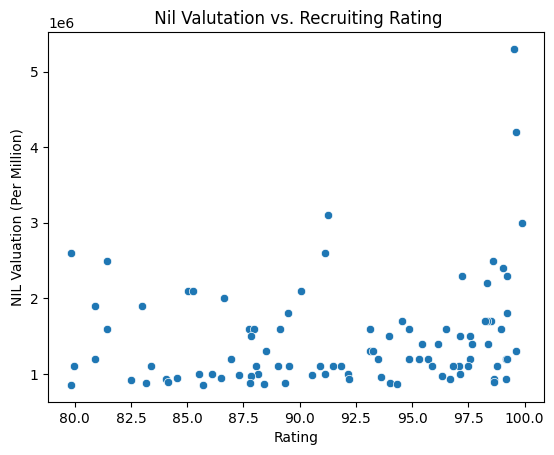

In [78]:
sns.scatterplot(data=df, x='Rating', y='NIL_Value')
plt.title(" Nil Valutation vs. Recruiting Rating")
plt.xlabel("Rating")
plt.ylabel("NIL Valuation (Per Million)")
plt.show()


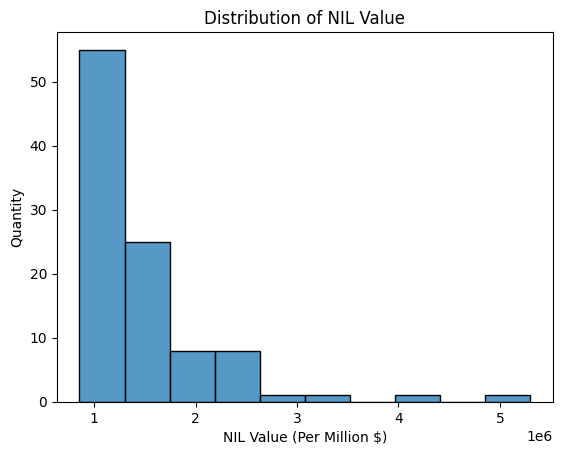

In [82]:
sns.histplot(data = df, x = "NIL_Value" , bins=10)
plt.title("Distribution of NIL Value")
plt.xlabel("NIL Value (Per Million $)")
plt.ylabel("Quantity")
plt.show()


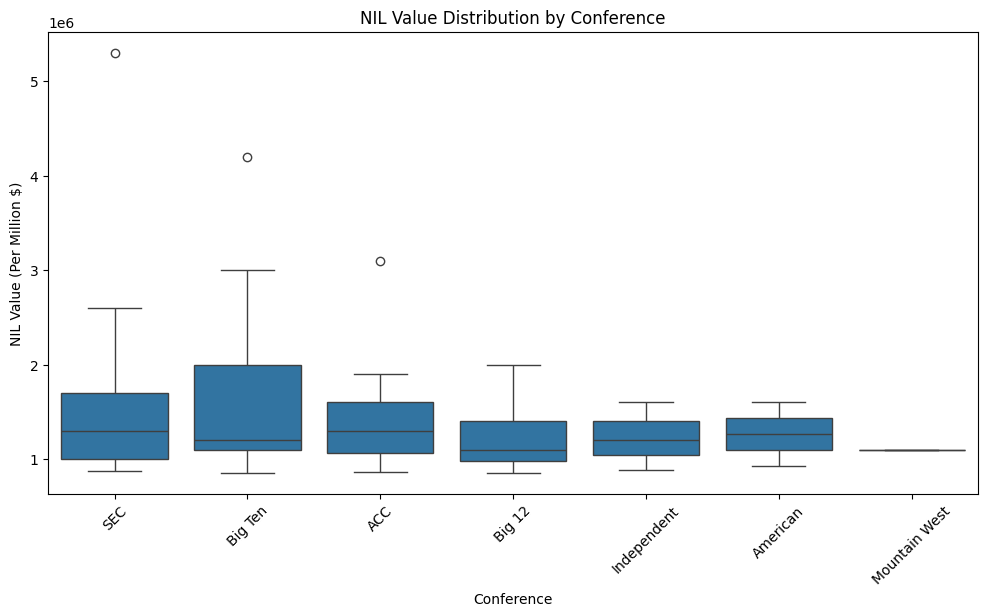

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Conference', y='NIL_Value')
plt.title("NIL Value Distribution by Conference")
plt.ylabel("NIL Value (Per Million $)")
plt.xticks(rotation=45)
plt.show()




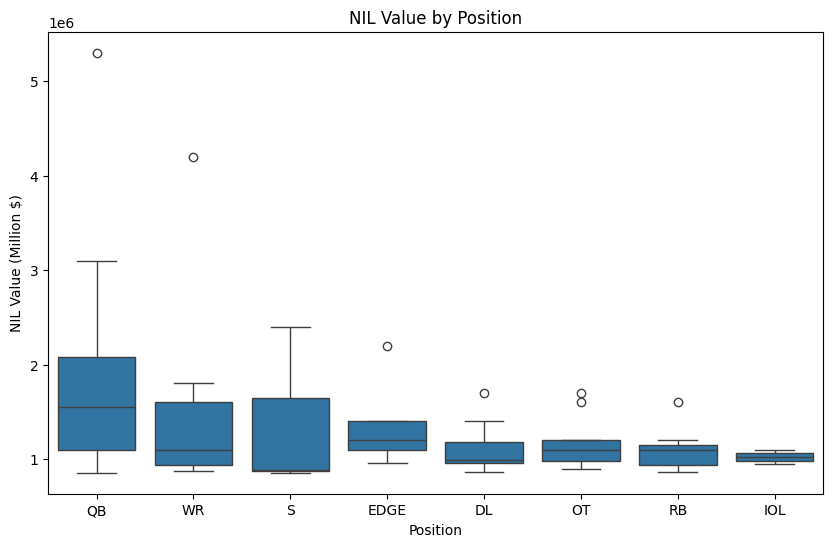

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Position", y="NIL_Value")
plt.title("NIL Value by Position")
plt.ylabel("NIL Value (Million $)")
plt.show()


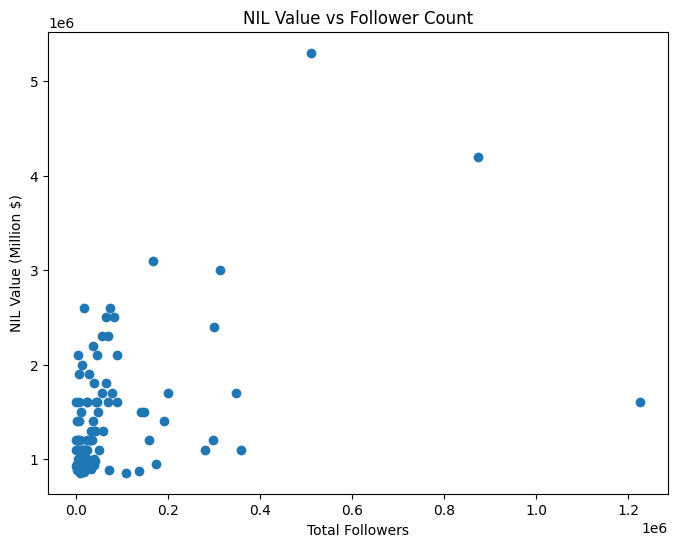

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Total_Followers"], df["NIL_Value"])
plt.title("NIL Value vs Follower Count")
plt.xlabel("Total Followers")
plt.ylabel("NIL Value (Million $)")
plt.show()


# 2. Data transformations for various plots, e.g. wide tables for heatmaps.

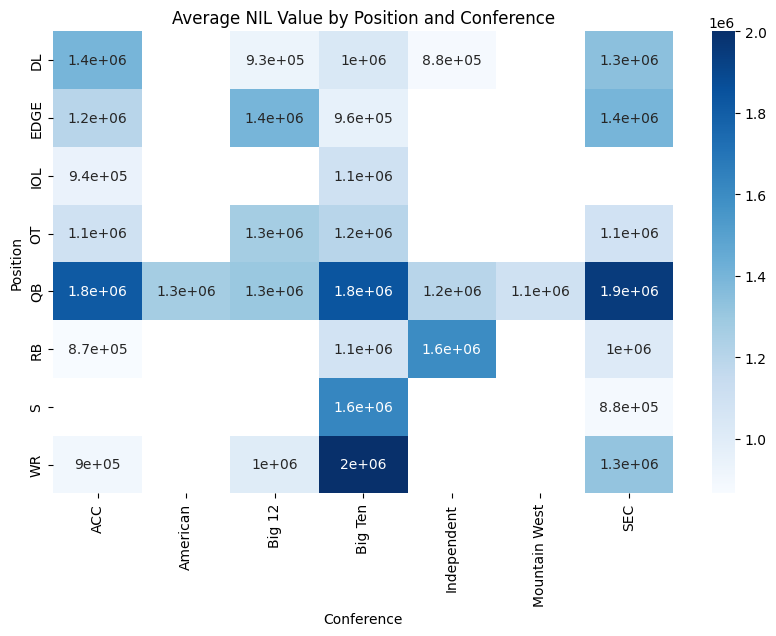

In [29]:
heatmap_table = df.pivot_table(
    index="Position",
    columns="Conference",
    values="NIL_Value",
    aggfunc="mean"
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_table, annot=True, cmap="Blues")
plt.title("Average NIL Value by Position and Conference")
plt.show()


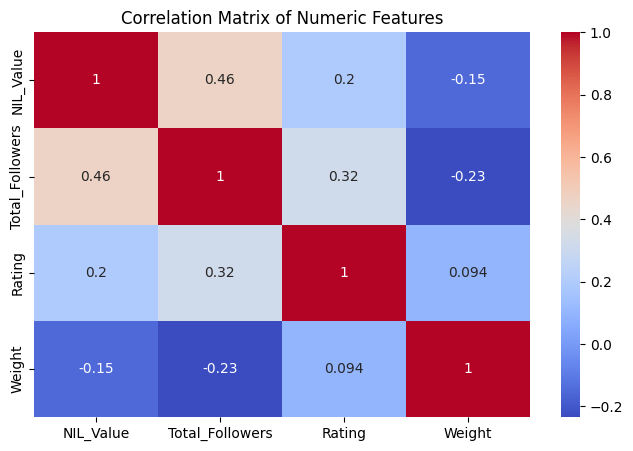

In [31]:
numeric_df = df[["NIL_Value", "Total_Followers", "Rating", "Weight"]]
corr_matrix = numeric_df.corr()
corr_matrix

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [32]:
avg_nil_pos = df.groupby("Position")["NIL_Value"].mean()
avg_nil_pos


Position
DL      1.112750e+06
EDGE    1.306556e+06
IOL     1.022000e+06
OT      1.151750e+06
QB      1.696761e+06
RB      1.105571e+06
S       1.380000e+06
WR      1.441154e+06
Name: NIL_Value, dtype: float64

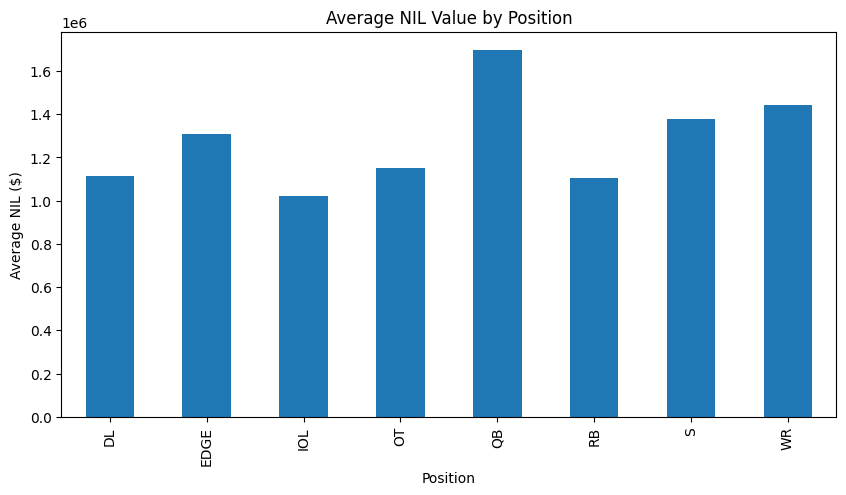

In [33]:
plt.figure(figsize=(10, 5))
avg_nil_pos.plot(kind="bar")
plt.title("Average NIL Value by Position")
plt.ylabel("Average NIL ($)")
plt.show()


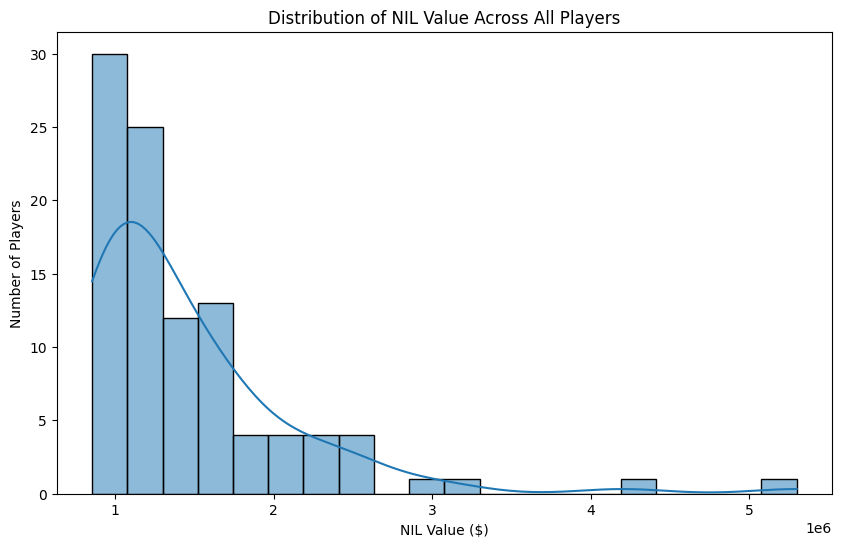

In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(df["NIL_Value"], bins=20, kde=True)
plt.title("Distribution of NIL Value Across All Players")
plt.xlabel("NIL Value ($)")
plt.ylabel("Number of Players")
plt.show()


# 3. Experiments with different plot types.

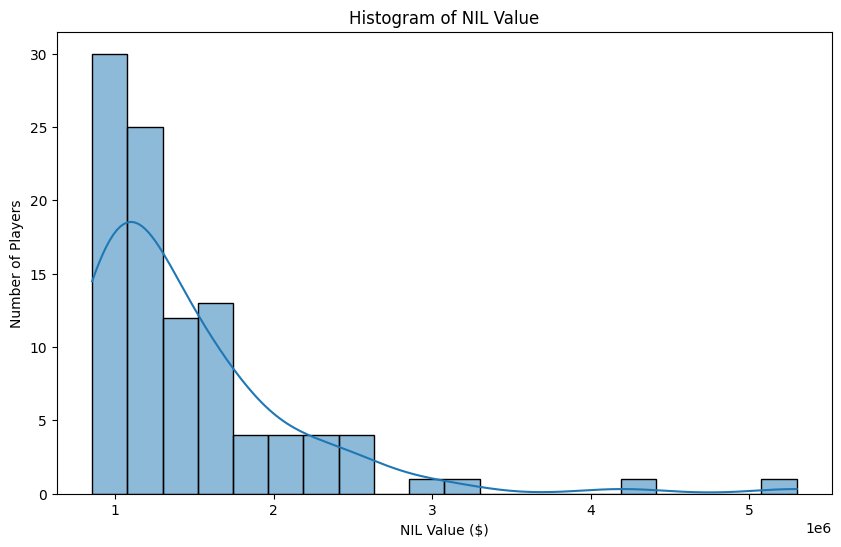

In [158]:
plt.figure(figsize=(10, 6))
sns.histplot(df["NIL_Value"], bins=20, kde=True)
plt.title("Histogram of NIL Value")
plt.xlabel("NIL Value ($)")
plt.ylabel("Number of Players")
plt.show()


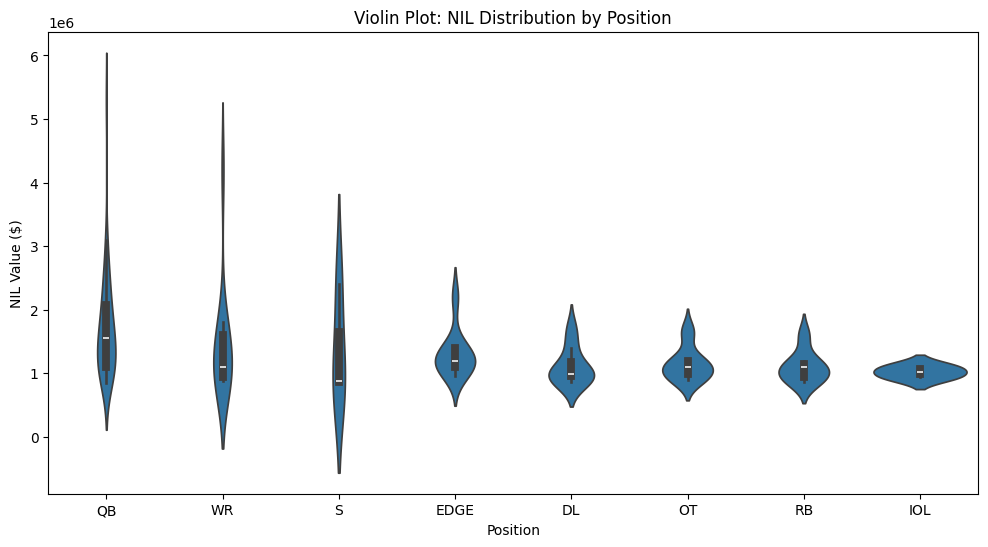

In [36]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Position", y="NIL_Value")
plt.title("Violin Plot: NIL Distribution by Position")
plt.ylabel("NIL Value ($)")
plt.show()


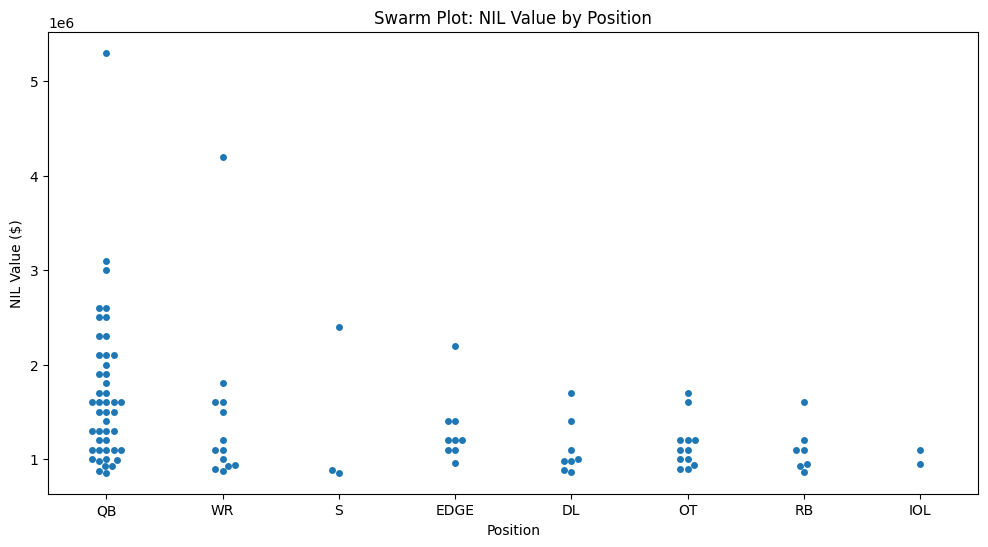

In [37]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x="Position", y="NIL_Value", size=5)
plt.title("Swarm Plot: NIL Value by Position")
plt.ylabel("NIL Value ($)")
plt.show()


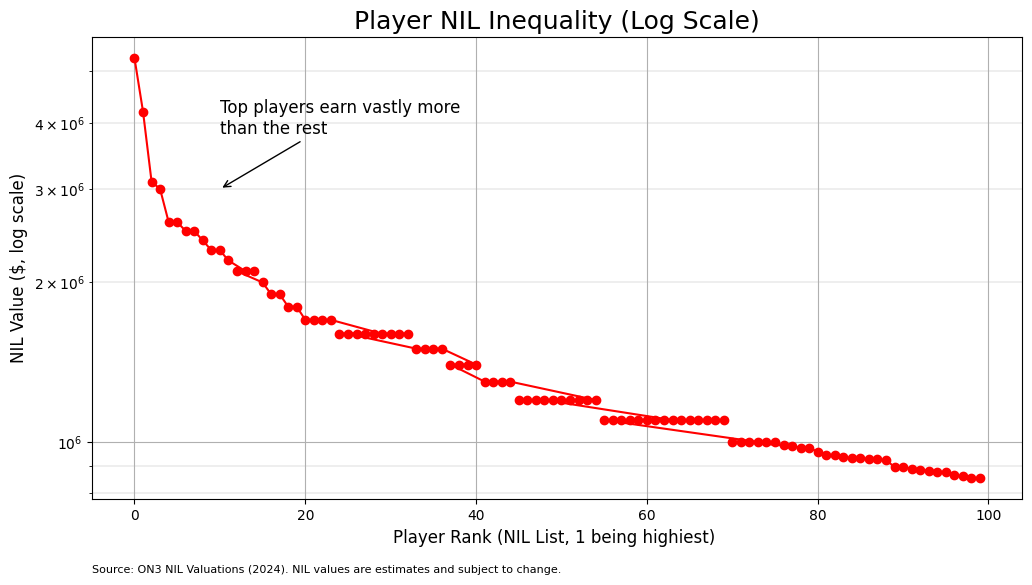

In [ ]:
nil_sorted = df["NIL_Value"].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.plot(nil_sorted, marker="o", color="red")
plt.yscale("log")
plt.grid(which="major", linestyle='-')
plt.grid(which="minor", linestyle='-', linewidth=0.3)
plt.title("Player NIL Inequality (Log Scale)", fontsize=18)
plt.xlabel("Player Rank (NIL List, 1 being highest) ", fontsize=12)
plt.ylabel("NIL Value ($, log scale)", fontsize=12)
plt.annotate(
    "Top players earn vastly more\nthan the rest",
    xy=(10, 3e6),               
    xytext=(0, 40),              
    textcoords="offset points",
    fontsize=12,
    arrowprops=dict(arrowstyle="->")
)

plt.text(0.0, -0.16,
     "Source: ON3 NIL Valuations (2024). NIL values are estimates and subject to change.",
     fontsize=8,
     transform=plt.gca().transAxes
)


plt.show()


/var/folders/19/rdtdwbss25g5vyf8hc0qfz7r0000gn/T/ipykernel_16940/1032296163.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gini = 1 - 2 * np.trapz(cum_nil, cum_players)


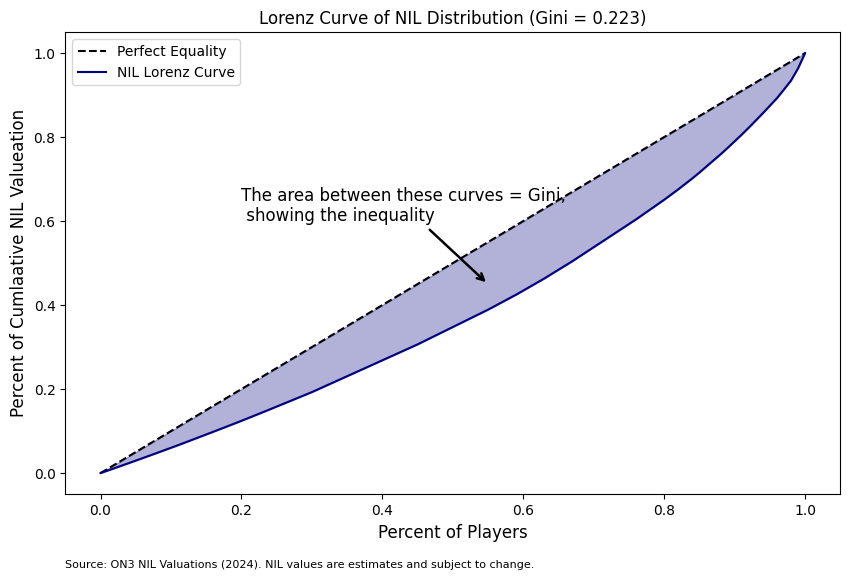

In [ ]:

NIL_Sort = df["NIL_Value"].sort_values()
cum_players = np.linspace(0, 1, len(NIL_Sort) + 1)
cum_nil = np.insert(np.cumsum(NIL_Sort) / NIL_Sort.sum(), 0, 0)
gini = 1 - 2 * np.trapz(cum_nil, cum_players)

plt.figure(figsize=(10, 6))
plt.plot(cum_players, cum_players, "--", color="black", label="Perfect Equality")
plt.plot(cum_players, cum_nil, color="#000080", label="NIL Lorenz Curve")
plt.fill_between(cum_players, cum_nil, cum_players, color="#000080", alpha=0.3)
plt.title(f"Lorenz Curve of NIL Distribution (Gini = {gini:.3f})")
plt.xlabel("Percent of Players", fontsize=12)
plt.ylabel("Percent of Cumlaative NIL Valueation", fontsize=12)

plt.annotate(
    "The area between these curves = Gini,\n showing the inequality",
    xy=(0.55, 0.45),          
    xytext=(0.20, 0.60),      
    fontsize=12,
    arrowprops=dict(arrowstyle="->", lw=1.8),)

plt.text(0.0, -0.16,
     "Source: ON3 NIL Valuations (2024). NIL values are estimates and subject to change.",
     fontsize=8,
     transform=plt.gca().transAxes
)


plt.legend()
plt.show()


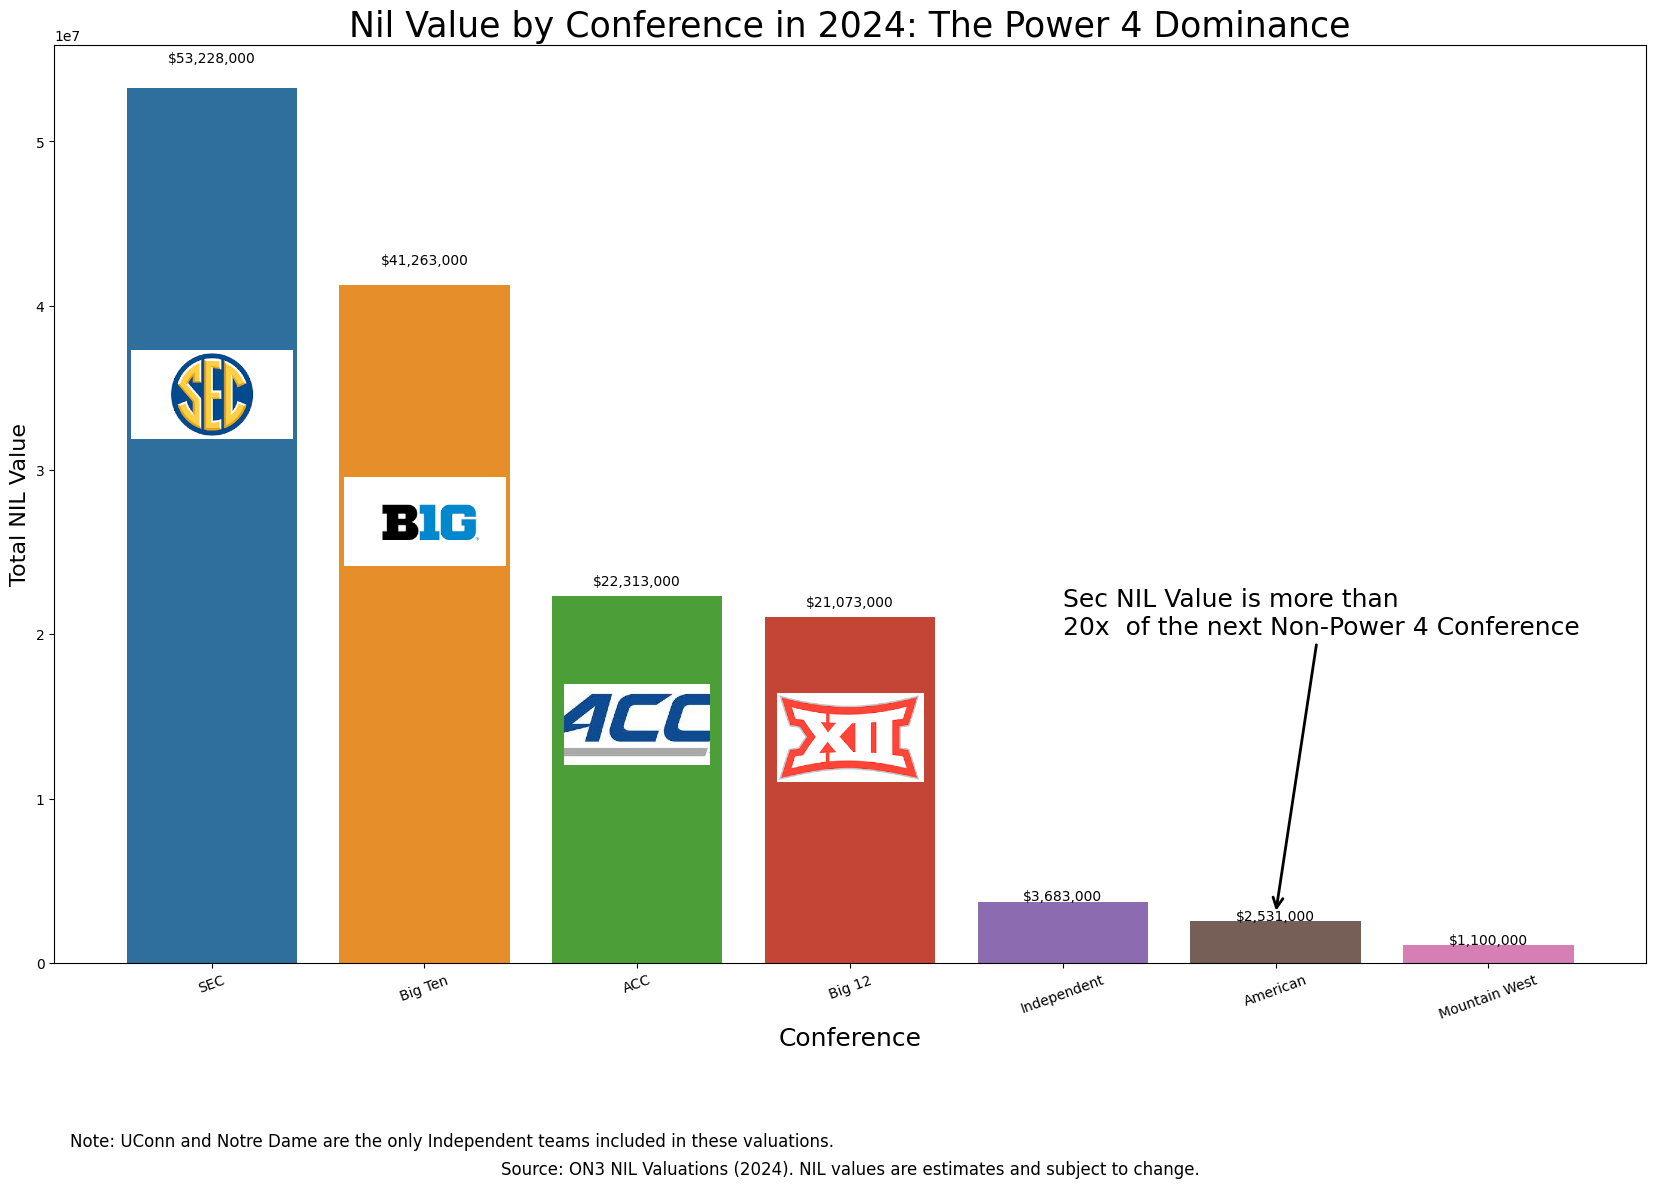

In [190]:
conf_share = df.groupby("Conference")["NIL_Value"].sum().sort_values(ascending=False)
sec_conf_share = conf_share["SEC"]
american_conf_share = conf_share["American"]
ratio = sec_conf_share / american_conf_share

plt.figure(figsize=(17, 12))

bars = plt.bar(
    conf_share.index,
    conf_share.values,
    color=["#2E6F9E", "#E58E2A", "#4C9F38", "#C44536", "#8C6BB1", "#755F56", "#D67FB5"])

plt.title(
    "Nil Value by Conference in 2024: The Power 4 Dominance",
    fontsize=25)
plt.ylabel("Total NIL Value", fontsize=16)
plt.xlabel("Conference", fontsize=18)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h * 1.03,
        f"${h:,.0f}",
        ha="center")


bar_positions = list(conf_share.index)

def add_logo(bar, path, zoom=0.43, height_factor=0.65):
    img = mpimg.imread(path)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox,
         (bar.get_x() + bar.get_width()/2, bar.get_height() * height_factor),frameon=False)
    plt.gca().add_artist(ab)
add_logo(bars[bar_positions.index("SEC")], "../Conference_images/sec.png")
add_logo(bars[bar_positions.index("Big Ten")], "../Conference_images/big10.png")
add_logo(bars[bar_positions.index("ACC")], "../Conference_images/ACC.png")
add_logo(bars[bar_positions.index("Big 12")], "../Conference_images/big12.png")

plt.annotate(
    "Sec NIL Value is more than\n20x  of the next Non-Power 4 Conference",
    xy=(5, 3000000),  
    xytext=(4, 20000000),  
    fontsize=18,
    arrowprops=dict(arrowstyle="->", lw=2)
)




plt.text(
    0.01, -0.20,
    "Note: UConn and Notre Dame are the only Independent teams included in these valuations.",
    fontsize=12,
    transform=plt.gca().transAxes,
)
plt.text(
    0.5, -0.23,
    "Source: ON3 NIL Valuations (2024). NIL values are estimates and subject to change.",
    fontsize=12,
    transform=plt.gca().transAxes,
    ha="center"
)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
